In [67]:
import pandas as pd

In [68]:
import requests

In [69]:
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=10000'


In [70]:
response = requests.get(url=url, auth=auth)

In [71]:
response

<Response [200]>

In [72]:
import json
data = json.loads(response.text)

In [73]:
data

{'took': 166,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 1.0,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'zWpMNXcBTeKmGB84ekLH',
    '_score': 1.0,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm25',
     'Value': 20,
     'LocationLat': 45.6568,
     'LocationLong': 25.5917,
     'TimeStamp': 1611506922000,
     'Measurement': 'µg/m3'}},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'z2pMNXcBTeKmGB84ekLI',
    '_score': 1.0,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm25',
     'Value': 20,
     'LocationLat': 45.670103,
     'LocationLong': 25.617966,
     'TimeStamp': 1611506907000,
     'Measurement': 'µg/m3'}},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': '0GpMNXcBTeKmGB84ekLJ',
    '_score': 1.0,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm1',
     'Value': 15,
     'L

In [74]:
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits'])

In [75]:
data['hits']

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': 1.0,
 'hits': [{'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'zWpMNXcBTeKmGB84ekLH',
   '_score': 1.0,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 20,
    'LocationLat': 45.6568,
    'LocationLong': 25.5917,
    'TimeStamp': 1611506922000,
    'Measurement': 'µg/m3'}},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'z2pMNXcBTeKmGB84ekLI',
   '_score': 1.0,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 20,
    'LocationLat': 45.670103,
    'LocationLong': 25.617966,
    'TimeStamp': 1611506907000,
    'Measurement': 'µg/m3'}},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': '0GpMNXcBTeKmGB84ekLJ',
   '_score': 1.0,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm1',
    'Value': 15,
    'LocationLat': 45.653509,
    'LocationLong': 25.56612,
    'TimeStamp': 1611506908000,
    'Measurement': 'µg/m3'}},
  {'_index': 'brasov-dev',
  

In [76]:
data2 = data['hits']

In [77]:
data2.keys()

dict_keys(['total', 'max_score', 'hits'])

In [78]:
data3 = data2['hits']

In [79]:
df = pd.concat(map(pd.DataFrame.from_dict, data3), axis=1)['_source'].T

In [80]:
#df

In [81]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

        LocationLat LocationLong Measurement Sensor       Source  \
_source     45.6568      25.5917       µg/m3   pm25  UradMonitor   
_source   45.670103    25.617966       µg/m3   pm25  UradMonitor   
_source   45.653509     25.56612       µg/m3    pm1  UradMonitor   
_source     45.6536       25.599       µg/m3   pm10  UradMonitor   
_source     45.6718      25.6006       µg/m3    pm1  UradMonitor   
_source   45.589267     25.46445       µg/m3   pm10  UradMonitor   
_source     45.6718      25.6006       µg/m3   pm25  UradMonitor   
_source   45.670103    25.617966       µg/m3    pm1  UradMonitor   
_source   45.653509     25.56612       µg/m3   pm25  UradMonitor   
_source   45.704032    25.640955       µg/m3    pm1  UradMonitor   
_source    45.71737     25.68571       µg/m3   pm10  UradMonitor   
_source   45.704032    25.640955       µg/m3   pm10  UradMonitor   
_source   45.702594    25.456175       µg/m3   pm10  UradMonitor   
_source    45.39324    25.442933       µg/m3   p

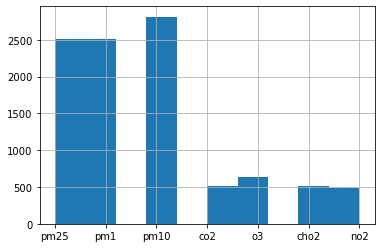

In [82]:
hist = df.get('Sensor').hist()

In [83]:
len(df)

10000

In [84]:
df.head(7)

,LocationLat,LocationLong,Measurement,Sensor,Source,TimeStamp,Value
_source,45.6568,25.5917,µg/m3,pm25,UradMonitor,1611506922000,20
_source,45.670103,25.617966,µg/m3,pm25,UradMonitor,1611506907000,20
_source,45.653509,25.56612,µg/m3,pm1,UradMonitor,1611506908000,15
_source,45.6536,25.599,µg/m3,pm10,UradMonitor,1611506893000,16
_source,45.6718,25.6006,µg/m3,pm1,UradMonitor,1586291052000,12
_source,45.589267,25.46445,µg/m3,pm10,UradMonitor,1611506937000,2
_source,45.6718,25.6006,µg/m3,pm25,UradMonitor,1586291052000,21


In [85]:
import matplotlib.pyplot as plt
plt.close("all")

In [86]:
pm25 = df[df.Sensor == 'pm25']

In [87]:
pm25.head(7)

,LocationLat,LocationLong,Measurement,Sensor,Source,TimeStamp,Value
_source,45.6568,25.5917,µg/m3,pm25,UradMonitor,1611506922000,20
_source,45.670103,25.617966,µg/m3,pm25,UradMonitor,1611506907000,20
_source,45.6718,25.6006,µg/m3,pm25,UradMonitor,1586291052000,21
_source,45.653509,25.56612,µg/m3,pm25,UradMonitor,1611506908000,24
_source,45.727,24.7057,µg/m3,pm25,UradMonitor,1611506908000,17
_source,45.516265,25.368046,µg/m3,pm25,UradMonitor,1581013677000,126
_source,45.662667,25.586687,µg/m3,pm25,UradMonitor,1611506918000,32


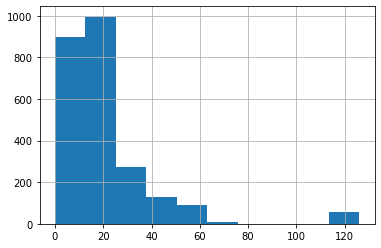

In [88]:
hist = pm25.get('Value').hist()


In [89]:
# pm25.sort_values('TimeStamp')
pm25_sorted = pm25.sort_values(by=['TimeStamp'], ascending=False)
pm25_sorted.head(20)
# pm25_sorted.head(3)

,LocationLat,LocationLong,Measurement,Sensor,Source,TimeStamp,Value
_source,45.641274,25.614817,µg/m3,pm25,UradMonitor,1611514319000,8
_source,45.646976,25.595224,µg/m3,pm25,UradMonitor,1611514319000,9
_source,45.661962,25.605432,µg/m3,pm25,UradMonitor,1611514319000,14
_source,45.645914,25.602642,µg/m3,pm25,UradMonitor,1611514319000,9
_source,45.589267,25.46445,µg/m3,pm25,UradMonitor,1611514317000,7
_source,45.665022,25.561726,µg/m3,pm25,UradMonitor,1611514314000,24
_source,45.642198,25.588532,µg/m3,pm25,UradMonitor,1611514312000,22
_source,45.70299,25.580067,µg/m3,pm25,UradMonitor,1611514310000,11
_source,45.673977,25.606484,µg/m3,pm25,UradMonitor,1611514309000,22
_source,45.703546,25.679012,µg/m3,pm25,UradMonitor,1611514307000,53


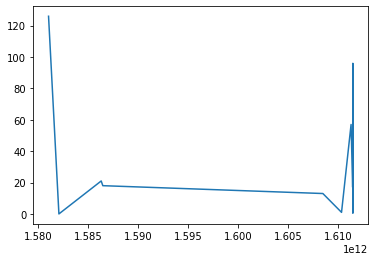

In [93]:
plt.plot(pm25_sorted.TimeStamp, pm25_sorted.Value)
plt.show()